<a href="https://colab.research.google.com/github/nupursjsu/Advanced-Deep-Learning/blob/master/Assignment_2_Part_2/Augmentation_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demonstrating the test time augmentation, mixup, label smoothing and cutout  

I have used **CIFAR10** dataset which contains 60,000 color images in 10 classes, each having a size of 32×32-pixel.

In [1]:
#Importing necessary libraries
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
#Defining hyperparameters
bs = 64 # batch size

In [3]:
path = untar_data(URLs.CIFAR);

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

In [5]:
path_train = path/'train'
path_test = path/'test'

In [6]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/cat')]

In [7]:
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/bird'),
 PosixPath('/root/.fastai/data/cifar10/test/dog'),
 PosixPath('/root/.fastai/data/cifar10/test/cat')]

In [8]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

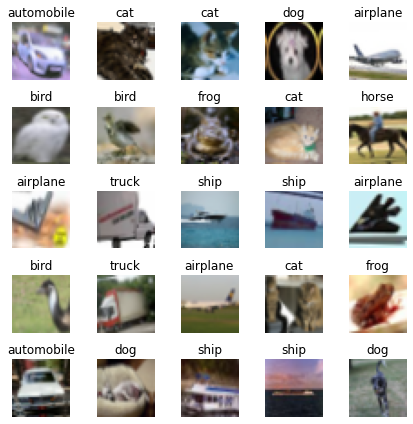

In [9]:
data.show_batch(rows=5, figsize=(6,6))

In [10]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.333681,1.146911,0.607300,02:02
1,0.982678,0.868786,0.695700,02:00
2,0.875783,0.758999,0.732400,01:59
3,0.795591,0.721597,0.743100,01:59


## Test Time Augmentation

In [13]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.7883999943733215

## Mixup

Mixup is a data augmentation technique that adds a mix of pictures to the training set.

In [17]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.711953,1.242697,0.575600,01:58
1,1.434326,0.941009,0.687200,01:55
2,1.320297,0.814148,0.726500,01:54
3,1.301716,0.801093,0.732800,01:54


## Label Smoothing

In [18]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.578185,1.388047,0.610200,01:54
1,1.264533,1.165898,0.708500,01:54
2,1.174234,1.105442,0.727000,01:55
3,1.134091,1.081494,0.735200,01:54


## Cutout

In [19]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]

In [20]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

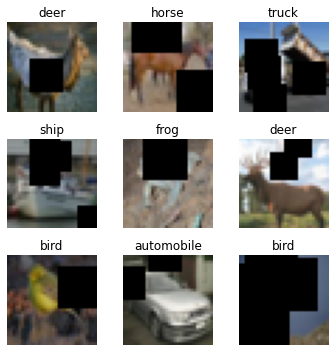

In [21]:
data.show_batch(rows=3, figsize=(5,5))

In [22]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.791198,1.653912,0.395900,01:13
1,1.437062,1.335781,0.522600,01:13
2,1.293205,1.203495,0.567900,01:13
3,1.233899,1.193281,0.572300,01:13
